## Percepción del color

La percepción del color tiene en cuenta el contexto. El valor RGB de un pixel puede corresponder a diferentes percepciones subjetivas.

### caso 1

![image1](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/color/chrmadp3.jpg)

### caso 2

![image1](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/color/greysquares.jpg)

(Ver ../images/color)

# Codificación del color


## Fundamentos

[color en wikipedia](https://en.wikipedia.org/wiki/Color), [color en hyperphysics](http://hyperphysics.phy-astr.gsu.edu/hbase/vision/colviscon.html#c1)

[espectro visible](https://en.wikipedia.org/wiki/Visible_spectrum#Spectral_colors), [LMS](https://en.wikipedia.org/wiki/Trichromacy)

[Tutorial](https://www.eecs.yorku.ca/~mbrown/ICCV19_Tutorial_MSBrown.pdf)

## Canales de color

In [1]:
import numpy             as np
import cv2               as cv
import skimage           as si
import skimage.color     as col
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def fig(w,h):
    return plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread("../images/"+file), cv.COLOR_BGR2RGB) 

def rgb2yuv(x):
    return cv.cvtColor(x,cv.COLOR_RGB2YUV)

def yuv2rgb(x):
    return cv.cvtColor(x,cv.COLOR_YUV2RGB)

from matplotlib.pyplot import subplot, imshow, title

El espacio de color [YUV](https://en.wikipedia.org/wiki/YUV) contiene en Y la intensidad de luz (monocromo, nivel de gris), y en UV codifica el color, independientemente de la intensidad.

In [3]:
rgb = readrgb("cube3.png")
mono = cv.cvtColor(rgb,cv.COLOR_RGB2GRAY)

yuv = rgb2yuv(rgb)
hsv = cv.cvtColor(rgb,cv.COLOR_RGB2HSV)
hls = cv.cvtColor(rgb,cv.COLOR_RGB2HLS)
lab = cv.cvtColor(rgb,cv.COLOR_RGB2Lab)
xyz = cv.cvtColor(rgb,cv.COLOR_RGB2XYZ)
xyz2 = col.rgb2xyz(rgb)

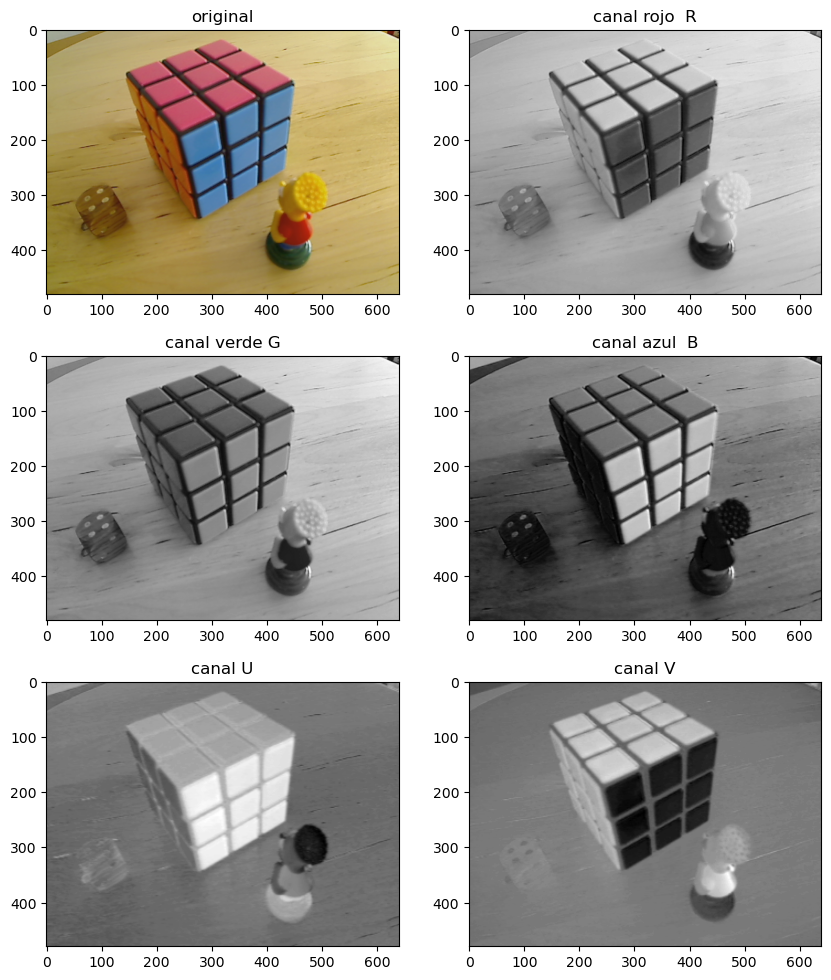

In [4]:
fig(10,12)
plt.set_cmap('gray')

subplot(3,2,1); imshow(rgb); title('original')
subplot(3,2,2); imshow(rgb[:,:,0]); title('canal rojo  R')
subplot(3,2,3); imshow(rgb[:,:,1]); title('canal verde G')
subplot(3,2,4); imshow(rgb[:,:,2]); title('canal azul  B')
subplot(3,2,5); imshow(yuv[:,:,1]); title('canal U')
subplot(3,2,6); imshow(yuv[:,:,2]); title('canal V');

El espacio [HSL](https://en.wikipedia.org/wiki/HSL_and_HSV#HSL) tiene canales de "tono" de color H (*hue*), saturación (S), y _lightness_ (L).

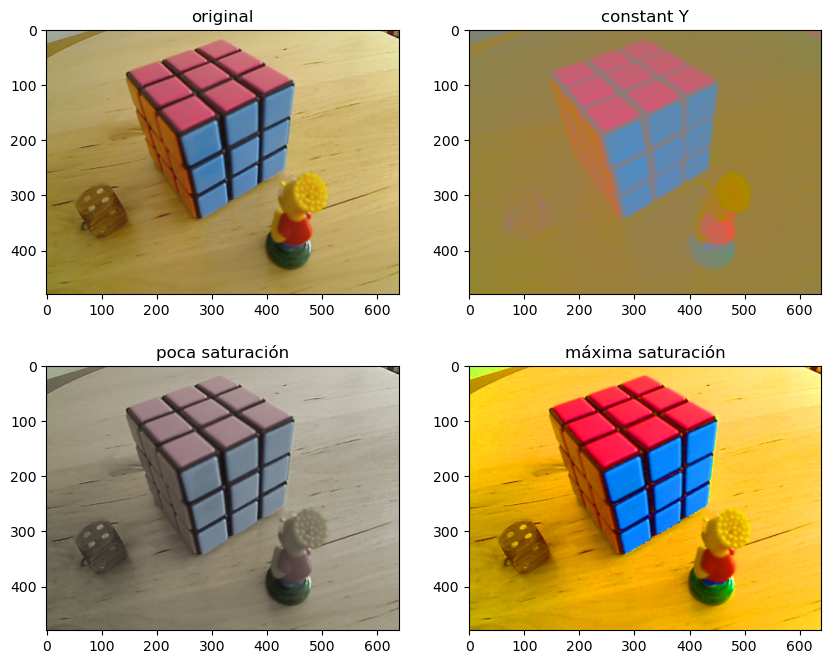

In [5]:
fig(10,8)
subplot(2,2,1); imshow(rgb), title('original')

x = yuv.copy()
x[:,:,0] = 128
y = yuv2rgb(x)
subplot(2,2,2); imshow(y); title('constant Y')

z = hls.copy()
z[:,:,2] = 32
w = cv.cvtColor(z,cv.COLOR_HLS2RGB)
subplot(2,2,3); imshow(w); title('poca saturación')

z[:,:,2] = 255
w = cv.cvtColor(z,cv.COLOR_HLS2RGB)
subplot(2,2,4); imshow(w); title('máxima saturación');

L de HLS y V de HSV son aproximaciones a la información de intensidad, pero incluyen información cromática.

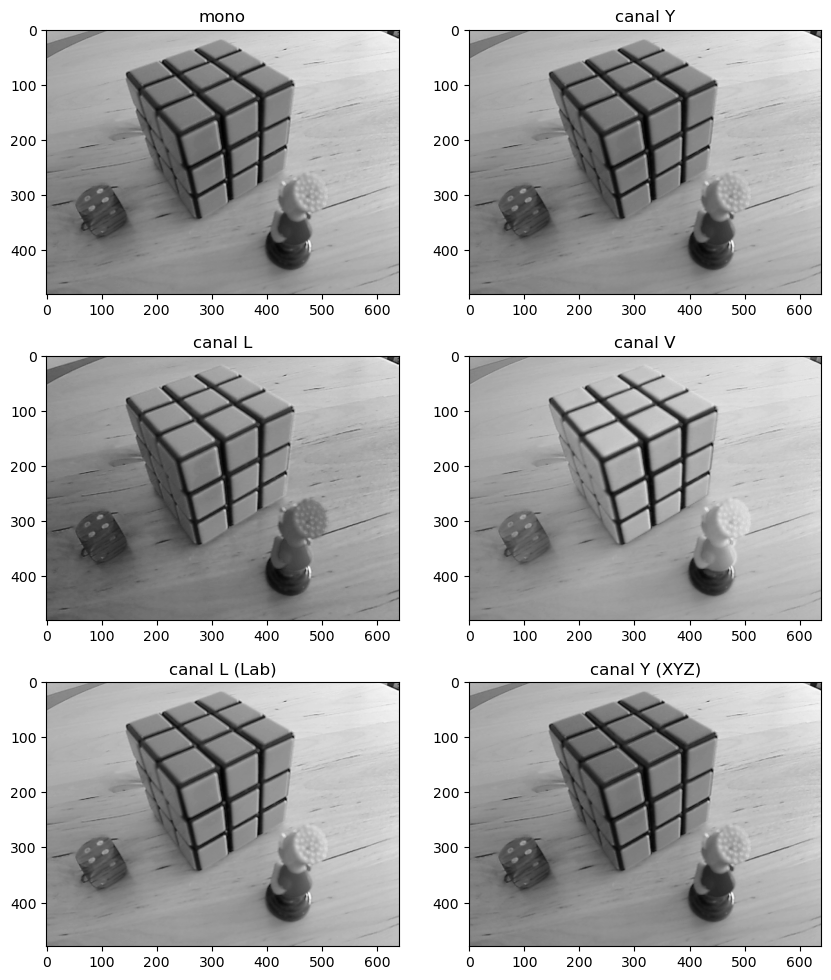

In [6]:
fig(10,12)
subplot(3,2,1); imshow(mono); title('mono')
subplot(3,2,2); imshow(yuv[:,:,0]); title('canal Y')
subplot(3,2,3); imshow(hls[:,:,1]); title('canal L');
subplot(3,2,4); imshow(hsv[:,:,2]); title('canal V');
subplot(3,2,5); imshow(lab[:,:,0]); title('canal L (Lab)');
subplot(3,2,6); imshow(xyz[:,:,1]); title('canal Y (XYZ)');

In [7]:
if False:
    print(abs(mono - yuv[:,:,0]).max())
    print(abs(mono - hls[:,:,1]).mean())
    print(abs(mono - hsv[:,:,2]).mean())
    print(abs(mono - lab[:,:,0]).mean())
    print(abs(mono - xyz[:,:,1]).mean())

Mostramos la gama de colores de diferentes espacios de color para varios valores del canal más relacionado con la intensidad.

In [8]:
r,c = np.mgrid[0:256,0:256]
test = np.zeros((256,256,3),np.uint8)

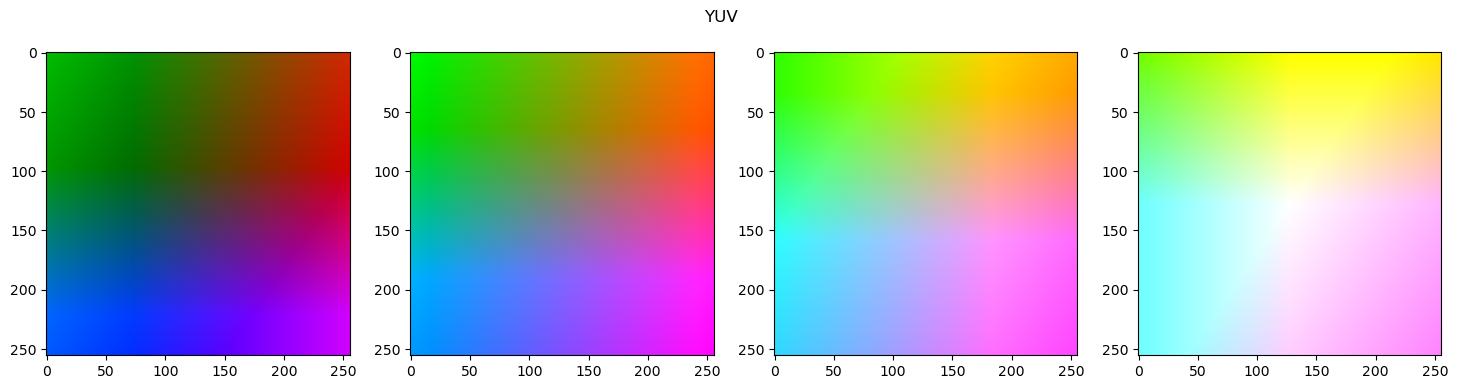

In [9]:
test[:,:,1] = r
test[:,:,2] = c
fig(18,4);
plt.suptitle('YUV')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,0] = v; plt.imshow(cv.cvtColor(test,cv.COLOR_YUV2RGB));

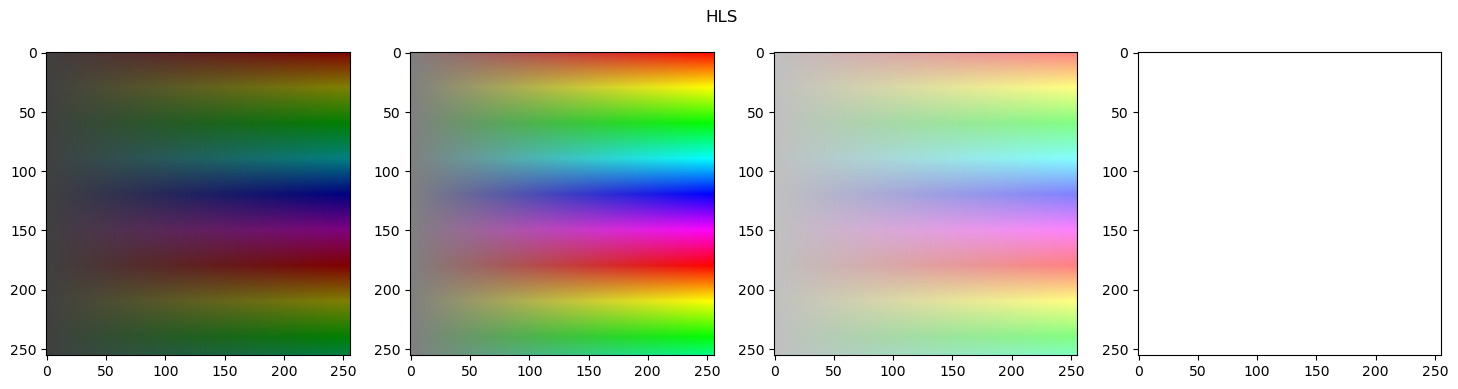

In [10]:
test[:,:,0] = r
test[:,:,2] = c
fig(18,4);
plt.suptitle('HLS')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,1] = v;  plt.imshow(cv.cvtColor(test,cv.COLOR_HLS2RGB));

El canal H (*hue*, tono de color) solo toma valores **0-179**. El resto hasta 255 repite los colores (es un ángulo en el espacio de color). Además, el intervalo correspondiente al rojo está desconectado, lo que debe tenerse en cuenta en determinadas aplicaciones de detección de color.

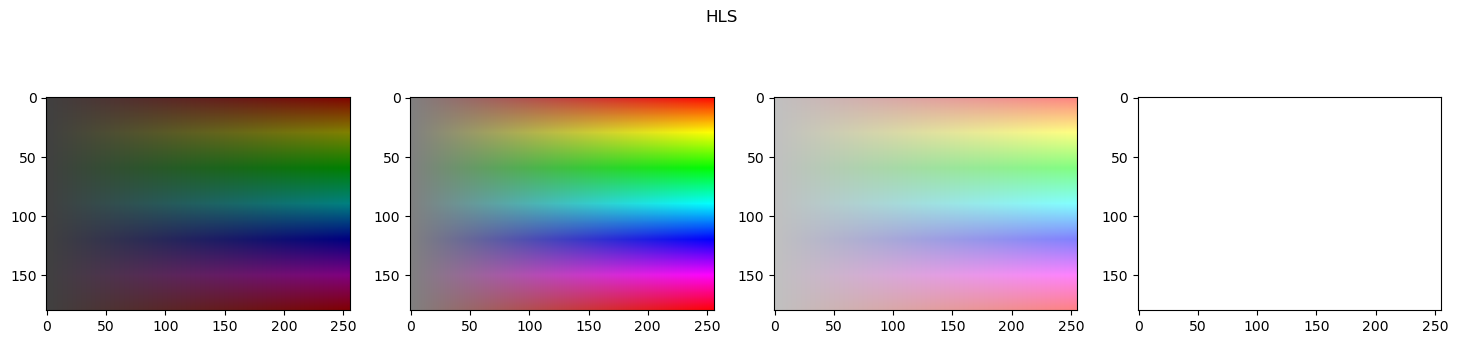

In [11]:
test[:,:,0] = r
test[:,:,2] = c
fig(18,4);
plt.suptitle('HLS')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,1] = v; plt.imshow(cv.cvtColor(test[:180],cv.COLOR_HLS2RGB));

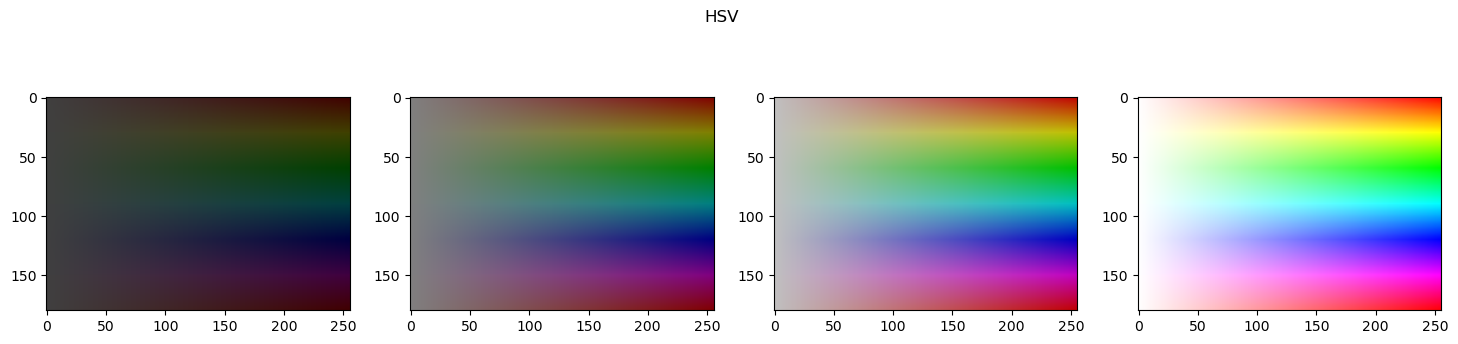

In [12]:
test[:,:,0] = r
test[:,:,1] = c
fig(18,4);
plt.suptitle('HSV')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,2] = v;  plt.imshow(cv.cvtColor(test[:180],cv.COLOR_HSV2RGB));

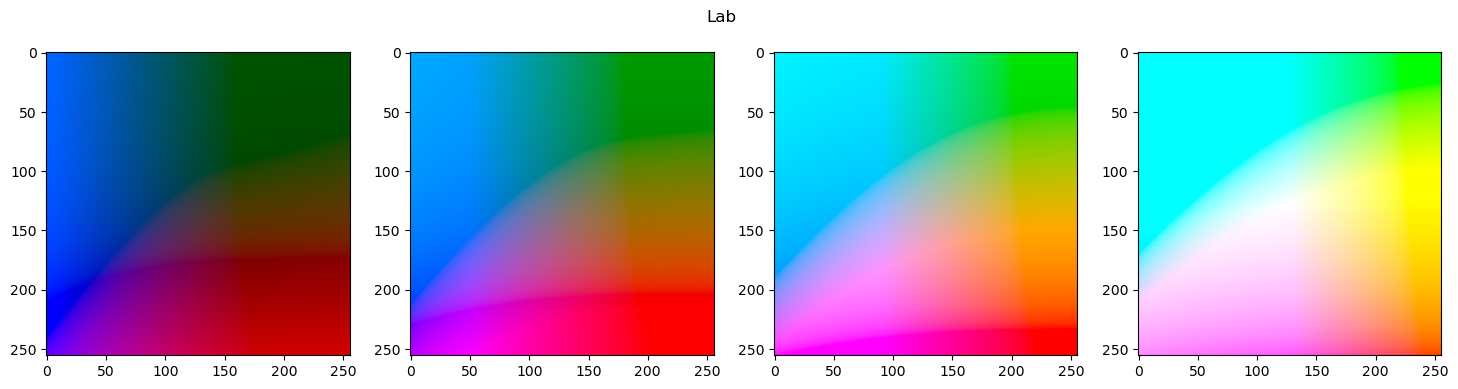

In [13]:
test[:,:,1] = r
test[:,:,2] = c
fig(18,4);
plt.suptitle('Lab')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,0] = v; plt.imshow(cv.cvtColor(test,cv.COLOR_Lab2RGB));

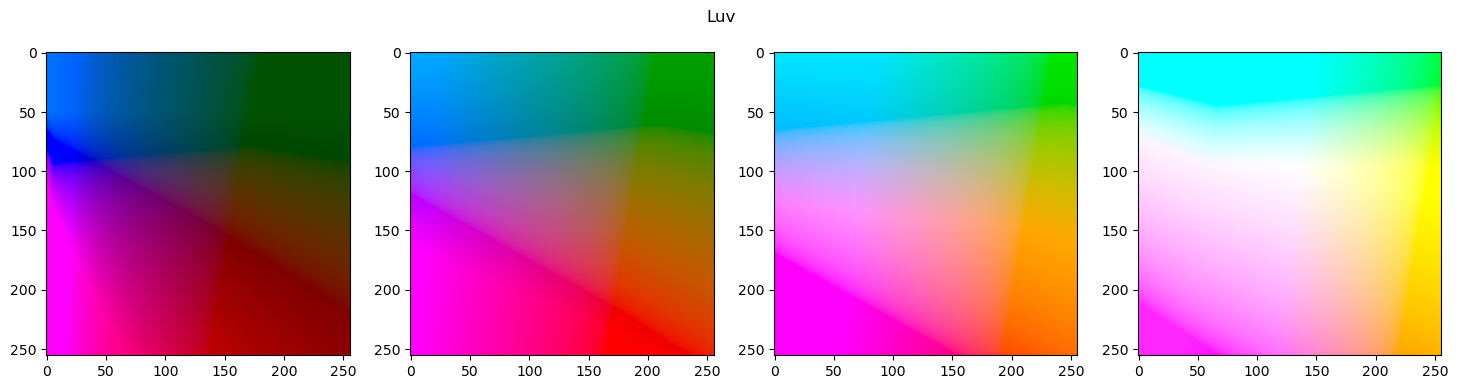

In [14]:
test[:,:,1] = r
test[:,:,2] = c
fig(18,4);
plt.suptitle('Luv')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,0] = v; plt.imshow(cv.cvtColor(test,cv.COLOR_Luv2RGB));

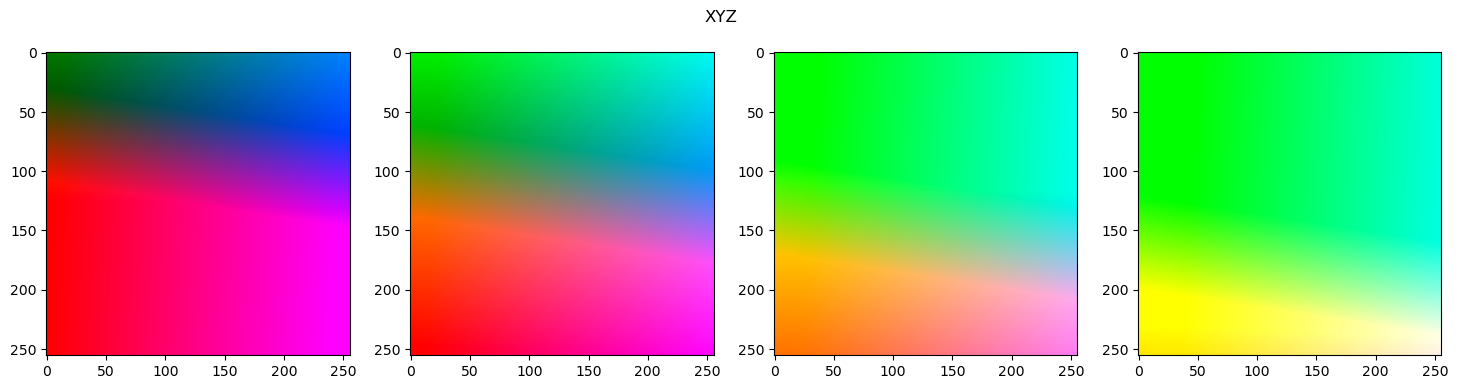

In [15]:
test[:,:,0] = r
test[:,:,2] = c
fig(18,4);
plt.suptitle('XYZ')
for k,v in enumerate([64,128,192,255]):
    subplot(1,4,k+1); test[:,:,1] = v; plt.imshow(cv.cvtColor(test,cv.COLOR_XYZ2RGB));

[oklab](https://bottosson.github.io/posts/oklab/),  [análisis](https://raphlinus.github.io/color/2021/01/18/oklab-critique.html)

## Umbralización

`cv.inRange`

### ROIs

![rois-1.png](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/demos/rois-2.png)

### input

![rois-1.png](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/demos/fruits.png)

### mask

![rois-1.png](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/demos/mask.png)

### masked input

![rois-1.png](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/demos/masked.png)

### ROIs

![rois-1.png](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/demos/rois-1.png)

### Contours

![contours.png](https://raw.githubusercontent.com/albertoruiz/umucv/master/images/demos/contours.png)